In [74]:
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt

In [2]:
login = pd.read_csv('login_logs.csv')

In [3]:
login.head()

,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01 00:00:33.0
1,1385329,83272,2021-07-01 00:00:38.0
2,1385330,83272,2021-07-01 00:00:42.0
3,1385331,96640,2021-07-01 00:02:08.0
4,1385332,99160,2021-07-01 00:02:38.0


In [4]:
sales_order = pd.read_csv('sales_orders.csv')

In [5]:
sales_order.head()

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0
2,119880,41728,8,Shipped,2021-07-01 02:42:12.0
3,119883,97616,4,Rejected,2021-07-01 02:56:00.0
4,119886,12440,1,Rejected,2021-07-01 03:11:31.0


In [6]:
sales_orders_items = pd.read_csv('sales_orders_items.csv')

In [7]:
sales_orders_items.head()

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85


In [8]:
engine = sqlalchemy.create_engine('sqlite://', echo=False)

In [9]:
login.to_sql("login_table" ,con = engine)

666357

In [10]:
sales_order.to_sql("sales_order" ,con = engine)

13630

In [11]:
sales_orders_items.to_sql('sales_orders_items',con = engine)

20488

##  1. Which KPIs would you use to measure the performance of our app?

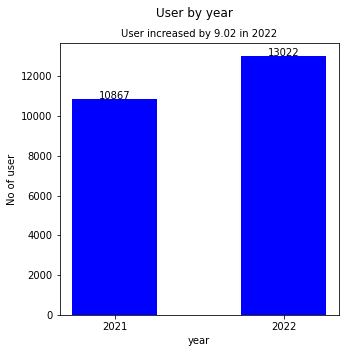

In [42]:
query1 = """select count(distinct(user_id)) user, 
          strftime('%Y',login_time) 
          from login_table group by strftime('%Y',login_time) """
l1 = engine.execute(query1).fetchall()
year=[]
values=[]
for i in range(len(l1)):
    year.append(l1[i][1])
    values.append(l1[i][0])
    
def percentage(l):
    total = l[0][0]+l[1][0]
    per = ((l[1][0]-l[0][0])/total)*100
    return round(per,2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
fig = plt.figure(figsize = (5, 5))
plt.bar(year, values, color ='blue',
        width = 0.5,)
addlabels(year, values)
 
plt.xlabel("year")
plt.ylabel("No of user")
plt.suptitle("User by year",fontsize = 'large')
plt.title("User increased by {} in 2022".format(percentage(l1)),fontsize = 'medium')
plt.axis()
plt.show()

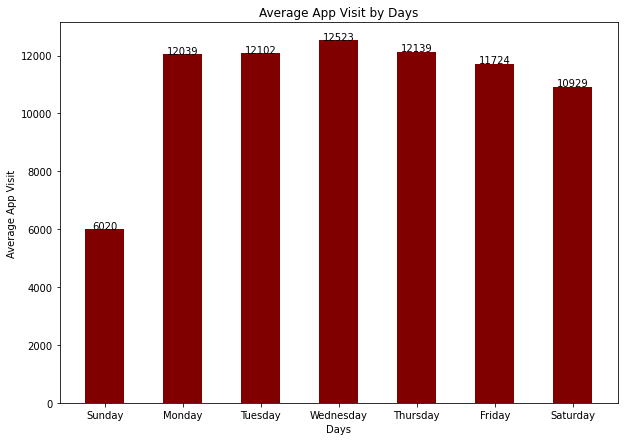

In [25]:
query2 = """select count(login_time)/count(distinct(date(login_time))) count1, 
            case cast (strftime('%w', login_time) as integer)
              when 0 then 'Sunday'
              when 1 then 'Monday'
              when 2 then 'Tuesday'
              when 3 then 'Wednesday'
              when 4 then 'Thursday'
              when 5 then 'Friday'
              else 'Saturday' end 
              from login_table group by strftime('%w',login_time) """

l2 = engine.execute(query2).fetchall()
days=[]
values=[]
for i in range(len(l2)):
    days.append(l2[i][1])
    values.append(l2[i][0])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
fig = plt.figure(figsize = (10, 7))
plt.bar(days, values, color ='maroon',
        width = 0.5,)
addlabels(days, values)
 
plt.xlabel("Days")
plt.ylabel("Average App Visit")
plt.title("Average App Visit by Days")
plt.show()

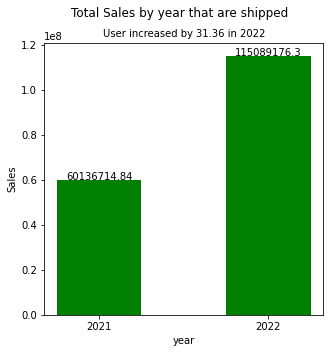

In [34]:
query3 = """select round(sum(case when so.sales_order_status = 'Shipped' then si.order_quantity_accepted*si.rate end),2), 
            strftime('%Y',so.creation_time) 
            from sales_orders_items si 
            inner join sales_order so 
            on so.order_id=si.fk_order_id 
            group by strftime('%Y',so.creation_time) """

l3 = engine.execute(query3).fetchall()
days=[]
values=[]
for i in range(len(l3)):
    days.append(l3[i][1])
    values.append(l3[i][0])

def percentage(l):
    total = l[0][0]+l[1][0]
    per = ((l[1][0]-l[0][0])/total)*100
    return round(per,2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
fig = plt.figure(figsize = (5, 5))
plt.bar(days, values, color ='green',
        width = 0.5,)
addlabels(days, values)
 
plt.xlabel("year")
plt.ylabel("Sales")
plt.suptitle("Total Sales by year that are shipped")
plt.title("User increased by {} in 2022".format(percentage(l3)),fontsize = 'medium')
plt.show()

## 2. Prepare a report regarding our growth between the 2 years. Please try to answer the following questions:

###  a. Did our business grow?

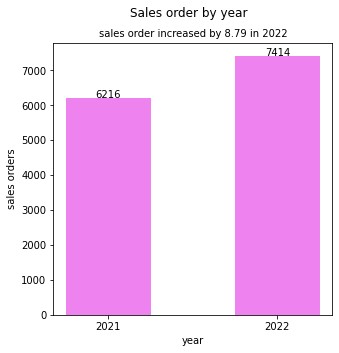

In [45]:
query4 = """select count(*) sales, 
          strftime('%Y',creation_time) 
          from sales_order group by strftime('%Y',creation_time) """

l4 = engine.execute(query4).fetchall()
year=[]
values=[]
for i in range(len(l4)):
    year.append(l4[i][1])
    values.append(l4[i][0])
    
def percentage(l):
    total = l[0][0]+l[1][0]
    per = ((l[1][0]-l[0][0])/total)*100
    return round(per,2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
fig = plt.figure(figsize = (5, 5))
plt.bar(year, values, color ='violet',
        width = 0.5,)
addlabels(year, values)
 
plt.xlabel("year")
plt.ylabel("sales orders")
plt.suptitle("Sales order by year",fontsize = 'large')
plt.title("sales order increased by {} in 2022".format(percentage(l4)),fontsize = 'medium')
plt.axis()
plt.show()

### b. Does our app perform better now?

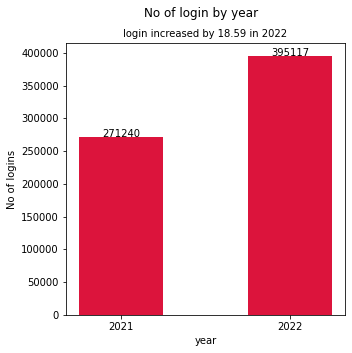

In [143]:
query5 = """select count(login_log_id) login, 
          strftime('%Y',login_time) 
          from login_table group by strftime('%Y',login_time) """

l5 = engine.execute(query5).fetchall()
year=[]
values=[]
for i in range(len(l5)):
    year.append(l5[i][1])
    values.append(l5[i][0])
    
def percentage(l):
    total = l[0][0]+l[1][0]
    per = ((l[1][0]-l[0][0])/total)*100
    return round(per,2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
fig = plt.figure(figsize = (5, 5))
plt.bar(year, values, color ='crimson',
        width = 0.5,)
addlabels(year, values)
 
plt.xlabel("year")
plt.ylabel("No of logins")
plt.suptitle("No of login by year",fontsize = 'large')
plt.title("login increased by {} in 2022".format(percentage(l5)),fontsize = 'medium')
plt.axis()
plt.show()

### c. Did our user base grow? 

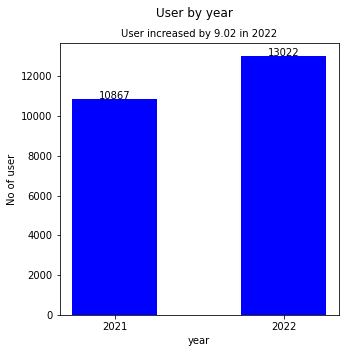

In [47]:
query6 = """select count(distinct(user_id)) user, 
          strftime('%Y',login_time) 
          from login_table group by strftime('%Y',login_time) """
l6 = engine.execute(query6).fetchall()
year=[]
values=[]
for i in range(len(l6)):
    year.append(l6[i][1])
    values.append(l6[i][0])
    
def percentage(l):
    total = l[0][0]+l[1][0]
    per = ((l[1][0]-l[0][0])/total)*100
    return round(per,2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
fig = plt.figure(figsize = (5, 5))
plt.bar(year, values, color ='blue',
        width = 0.5,)
addlabels(year, values)
 
plt.xlabel("year")
plt.ylabel("No of user")
plt.suptitle("User by year",fontsize = 'large')
plt.title("User increased by {} in 2022".format(percentage(l6)),fontsize = 'medium')
plt.axis()
plt.show()

## 3. What are our top-selling products in each of the two years? Can you draw some insight from this?

In [68]:
query7 = """select strftime('%Y', so.creation_time) year, 
        si.fk_product_id, 
        sum(si.ordered_quantity) total_quantity_ordered,
        sum(si.order_quantity_accepted) Accepted_quantity
        from sales_orders_items si 
        inner join sales_order so 
        on so.order_id=si.fk_order_id 
        where strftime('%Y', so.creation_time) = '2021'
        group by fk_product_id
        order by total_quantity_ordered desc
        limit 2"""
l7 = engine.execute(query7).fetchall()

query8 = """select strftime('%Y', so.creation_time) year, 
        si.fk_product_id, 
        sum(si.ordered_quantity) total_quantity_ordered,
        sum(si.order_quantity_accepted) Accepted_quantity
        from sales_orders_items si 
        inner join sales_order so 
        on so.order_id=si.fk_order_id 
        where strftime('%Y', so.creation_time) = '2022'
        group by fk_product_id
        order by total_quantity_ordered desc
        limit 2"""
l8 = engine.execute(query8).fetchall()

df_2021 = pd.DataFrame(l7,columns=['Year','Product_id','Total_quantity_ordered','Accepted_quantity'])
df_2021

,Year,Product_id,Total_quantity_ordered,Accepted_quantity
0,2021,8219,2433,850
1,2021,10235,1840,1045


In [69]:
df_2022 = pd.DataFrame(l8,columns=['Year','Product_id','Total_quantity_ordered','Accepted_quantity'])
df_2022

,Year,Product_id,Total_quantity_ordered,Accepted_quantity
0,2022,12547,2018,1572
1,2022,8444,1945,1139


## 4.Looking at July 2021 data, what do you think is our biggest problem and how would you recommend fixing it?

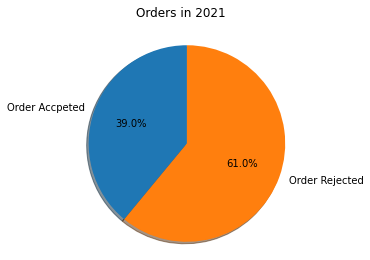

In [86]:
query9 = """select sum(si.ordered_quantity),
            sum(case when so.sales_order_status = 'Shipped' then si.ordered_quantity end) as order_accepted,
            sum(case when so.sales_order_status = 'Rejected' then si.ordered_quantity end) as order_rejected
            from sales_order so
            inner join sales_orders_items si
            on so.order_id=si.fk_order_id 
            where strftime('%Y', so.creation_time) = '2021' """
l9 = engine.execute(query9).fetchall()
y = np.array([l9[0][1],l9[0][2]])
label = ["Order Accpeted","Order Rejected"]
plt.pie(y, labels = label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.suptitle("Orders in 2021",fontsize = 'large')
plt.axis('equal')
plt.show() 
